In [336]:
import numpy as np
import matplotlib.pyplot as plt
from mbe.util import mag_to_db

In [337]:
def interpolated_read(x, idx):
    EPS = 1e-10

    residual = idx % 1

    is_whole_number = (residual < EPS)
    if is_whole_number:
        return x[idx.astype(int)]
    
    below = x[np.floor(idx).astype(int)]
    above = x[np.ceil(idx).astype(int)]

    return below * (1 - residual) + above * (residual)

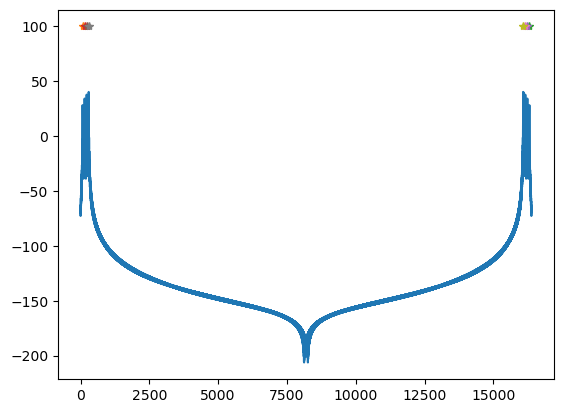

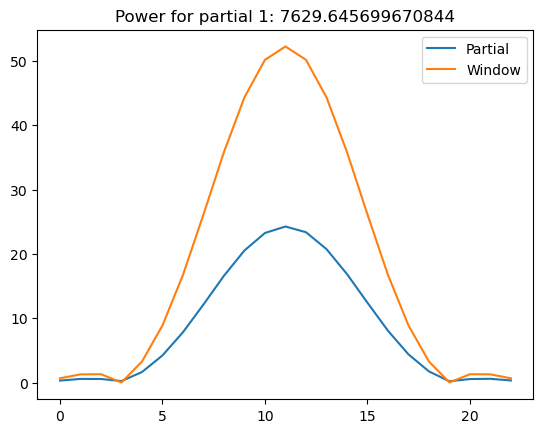

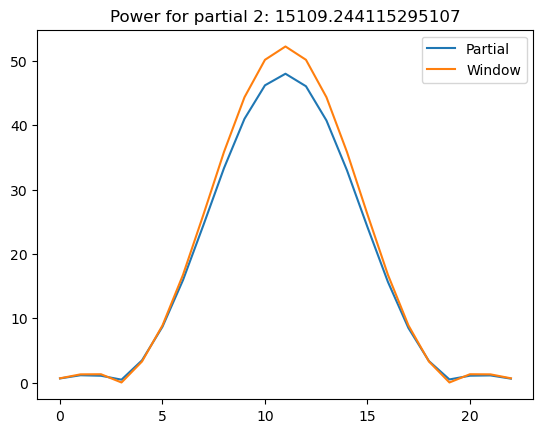

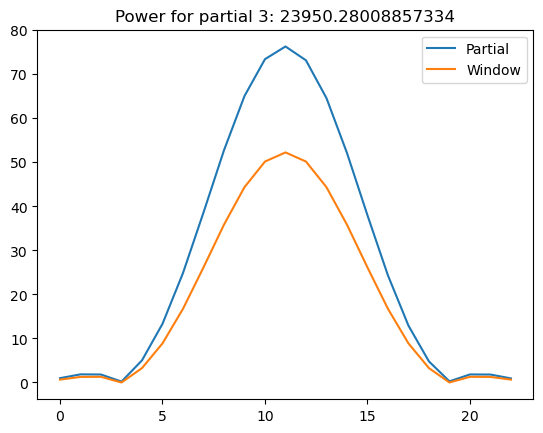

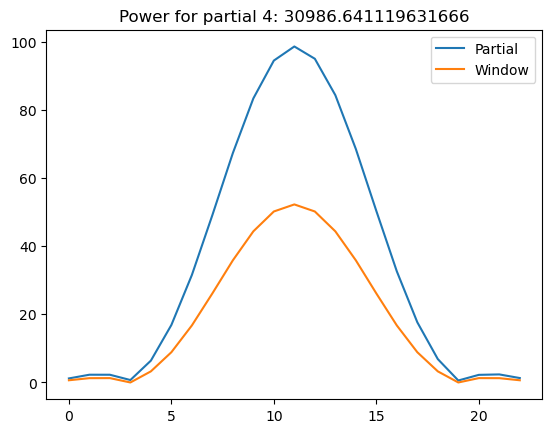

np.sum(x ** 2) = 14.999997537764372
np.sum(|X| ** 2) / nfft = 14.999997537764372
np.real(power) / nfft = [0.46567662 0.92219508 1.46180909 1.89127448]
np.real(all_power) / np.real(all_power)[0] = [1.         1.98033365 3.13910777 4.06134732]


In [341]:
frame_size = 4096
window = np.hanning(frame_size)
window /= np.sqrt(np.sum(window ** 2))
nfft = 4096 * 4
num_search = nfft // frame_size * 3

W = np.fft.fft(window, nfft)
alpha = 1

sr = 44100
f0 = 200
time = np.arange(frame_size) / sr

num_partials = 4
x = np.zeros(frame_size)

which_bin = f0 / sr * nfft
for i in range(num_partials):
    x += alpha * np.cos(2 * np.pi * (i + 1) * f0 * time) * (i + 1)

x *= window

X = np.fft.fft(x, nfft)

plt.plot(mag_to_db(np.abs(X)))
for i in range(num_partials):
    bin_idx = (i + 1) * which_bin
    plt.plot(bin_idx, 100, '*')
    plt.plot(nfft - bin_idx, 100, '*')

plt.show()

all_power = []
for i in range(num_partials):
    bin_idx = (i + 1) * which_bin

    power = 0
    segment = []
    lobe = []

    for j in range(num_search):

        power += W[j] * np.conj(interpolated_read(X, bin_idx + j))
        power += W[j] * np.conj(interpolated_read(X, -bin_idx - j))

        lobe.append(interpolated_read(X, bin_idx + j))
        segment.append(W[j])
        
        if j == 0:
            continue
        
        power += W[-j] * np.conj(interpolated_read(X, bin_idx - j))
        power += W[-j] * np.conj(interpolated_read(X, -bin_idx + j))

        lobe.insert(0, interpolated_read(X, bin_idx - j))
        segment.insert(0, W[-j])
    
    plt.plot(np.abs(lobe))
    plt.plot(np.abs(segment))
    plt.title(f"Power for partial {i + 1}: {np.real(power)}")
    plt.legend(["Partial", "Window"])

    plt.show()
    all_power.append(np.real(power))

print(f"np.sum(x ** 2) = {np.sum(x ** 2)}")
print(f"np.sum(|X| ** 2) / nfft = {np.sum(np.abs(X) ** 2) / nfft }")
print(f"np.real(power) / nfft = {np.real(all_power) / nfft}")
print(f"np.real(all_power) / np.real(all_power)[0] = {np.real(all_power) / np.real(all_power)[0]}")
plt.show()